In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("/content/Credit Score Classification Dataset.csv")
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [11]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


In [13]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

In [23]:
label_encoders = {}
for column in ['Gender', 'Education', 'Marital Status', 'Home Ownership']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

scaler = StandardScaler()
df[['Age','Income','Number of Children']] = scaler.fit_transform(df[['Age','Income','Number of Children']])


In [24]:
x = df.drop('Credit Score', axis=1)
y = df['Credit Score']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for model_name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

In [26]:
#Storie Metrics
results[model_name] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall" : recall_score(y_test, y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred, average='weighted')

}

In [27]:
results_df = pd.DataFrame(results).T
print(results_df)

               Accuracy  Precision    Recall  F1 Score
Random Forest  0.969697    0.97096  0.969697  0.968336


Model Evaluation and Metrics

In [29]:
#Confusion matrix & classification report for Random forest
best_model = models["Random Forest"]
y_pred = best_model.predict(x_test)

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report :")
print(classification_report(y_test, y_pred))


Confusion Matrix :
[[ 4  1  0]
 [ 0 23  0]
 [ 0  0  5]]

 Classification Report :
              precision    recall  f1-score   support

     Average       1.00      0.80      0.89         5
        High       0.96      1.00      0.98        23
         Low       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33



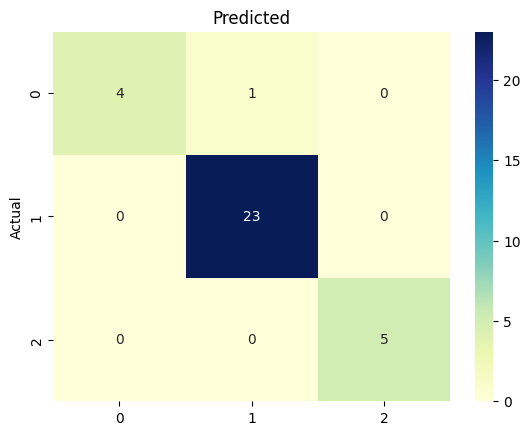

In [30]:
#plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Predicted')
plt.ylabel('Actual')
plt.show()

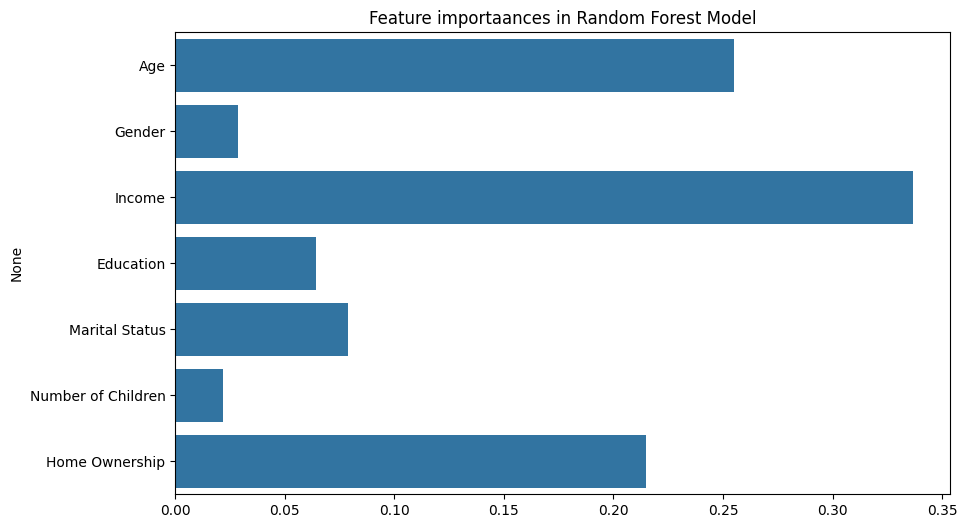

In [35]:
feature_importances = best_model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature importaances in Random Forest Model')
plt.show()

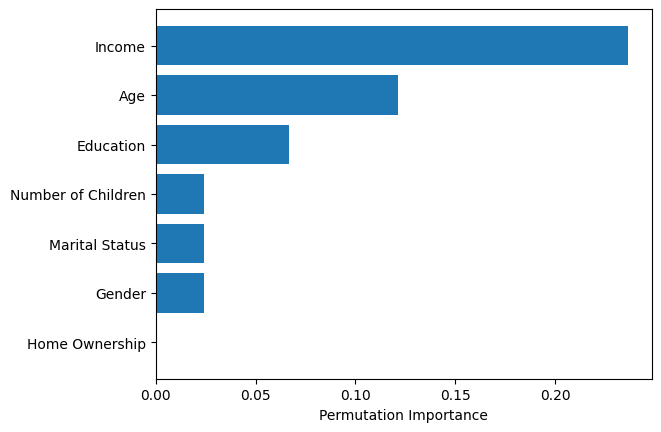

In [37]:
perm_importance = permutation_importance(models["Logistic Regression"], x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()